In [1]:
import pandas as pd

In [38]:
import numpy as np


In [2]:
import os
print("Current Directory:", os.getcwd())  # Shows where Jupyter is running
print("Files in Directory:", os.listdir())  # Lists all files in the directory


Current Directory: C:\Users\asus\OneDrive\Desktop\jupyter projects
Files in Directory: ['.ipynb_checkpoints', 'Bike sharing', 'Bike sharing.zip', 'bike+sharing+dataset', 'Firstproject.ipynb', 'Untitled.ipynb', 'untitled.py', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [3]:
import pandas as pd

df = pd.read_csv("day.csv")  # Load the dataset
print(df.head())  # Show the first 5 rows


FileNotFoundError: [Errno 2] No such file or directory: 'day.csv'

In [4]:
import pandas as pd

df = pd.read_csv("day.csv")  # Load the dataset
print(df.head())  # Show the first 5 rows


   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  


In [5]:
print(df.columns)  # Shows all column names


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [6]:
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

In [7]:
print(df.isnull().sum())  # Shows missing values in each column


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
df = df.drop(["instant"], axis=1)  # Drop the 'instant' column


In [9]:
df['season'] = df['season'].astype('category')
df['season'] = df['season'].cat.codes  # Convert categories to numbers


In [10]:
import matplotlib.pyplot as plt

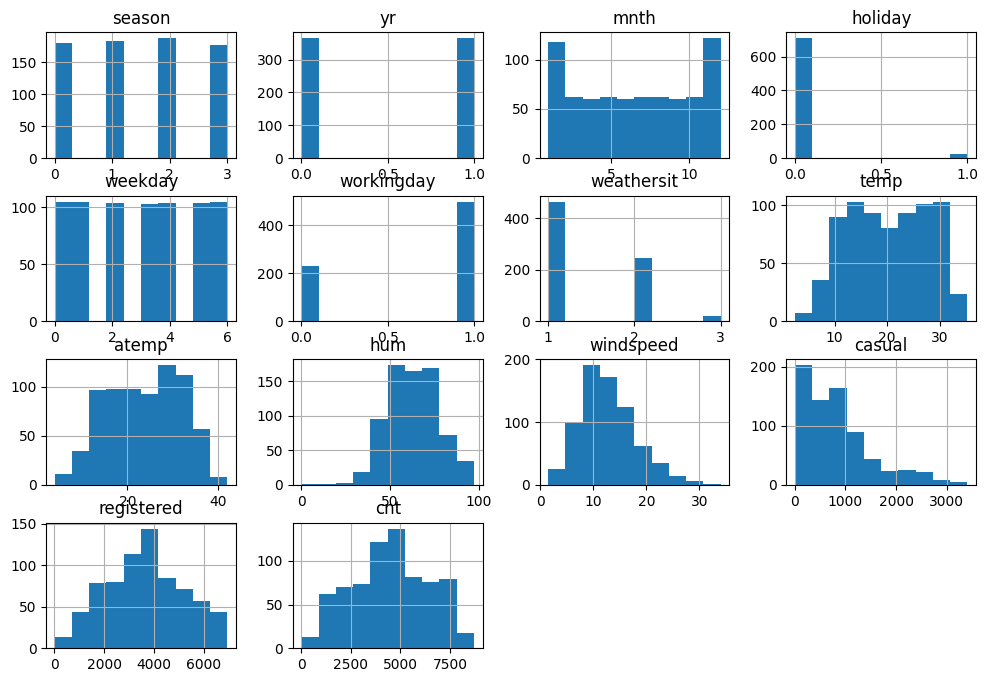

In [11]:
df.hist(figsize=(12, 8))  # Plot histograms for all numeric columns
plt.show()

In [24]:
# Check non-numeric columns
print(df.dtypes)

# Convert categorical columns to numeric
categorical_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for col in categorical_cols:
    df[col] = df[col].astype("category").cat.codes


dteday         object
season           int8
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


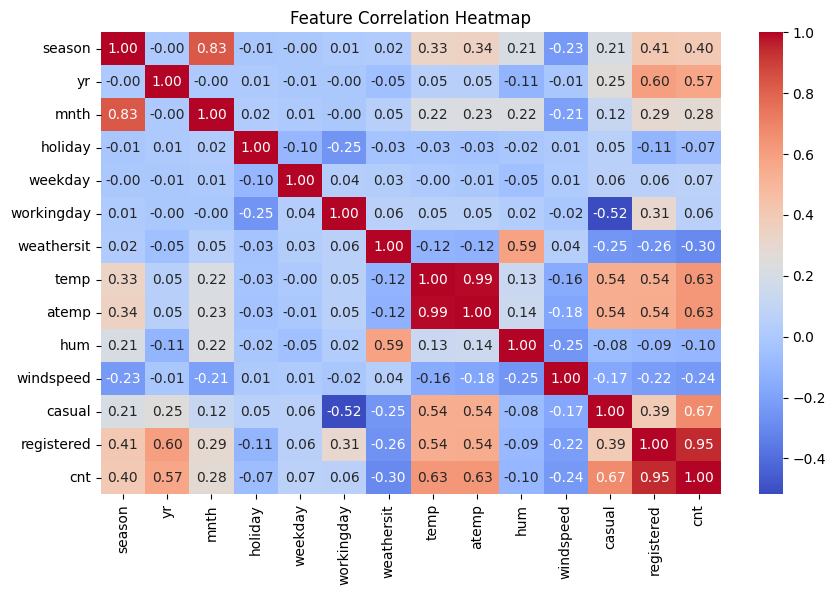

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(["cnt"], axis=1)  # Features (drop target column)
y = df["cnt"]  # Target variable (total count of bike rentals)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (584, 14)
Test set size: (146, 14)


In [29]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


ValueError: could not convert string to float: '05-09-2018'

In [30]:
print(X_train.isnull().sum())  # Check for missing values in X_train
print(y_train.isnull().sum())  # Check for missing values in y_train


dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64
0


In [31]:
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
y_train = y_train.fillna(y_train.mean())


TypeError: Could not convert ['05-09-201802-12-201804-12-201917-03-201917-05-201829-10-201907-01-201829-01-201908-09-201801-07-201823-10-201926-05-201804-07-201913-05-201805-08-201927-03-201911-02-201819-04-201809-10-201826-02-201829-06-201929-08-201905-12-201824-06-201925-01-201818-10-201818-07-201830-08-201907-01-201920-10-201821-04-201824-03-201821-02-201804-02-201908-08-201919-05-201922-10-201816-10-201931-10-201926-11-201901-08-201819-01-201815-06-201922-09-201819-10-201826-04-201925-03-201803-03-201826-06-201928-02-201930-01-201820-03-201931-07-201824-10-201821-09-201902-07-201806-06-201916-11-201809-12-201919-12-201807-08-201928-08-201824-11-201829-07-201805-01-201910-12-201926-06-201817-01-201929-11-201817-06-201913-07-201918-05-201811-11-201815-11-201908-10-201913-06-201827-12-201803-10-201918-09-201913-12-201908-11-201830-11-201802-04-201915-04-201825-04-201818-10-201926-11-201817-10-201922-06-201903-04-201808-01-201831-03-201827-08-201925-07-201903-03-201908-11-201906-09-201902-05-201913-02-201925-11-201921-05-201829-01-201813-02-201812-02-201815-03-201817-06-201811-06-201901-10-201908-03-201812-01-201807-12-201828-06-201823-05-201915-04-201927-06-201811-05-201904-08-201915-09-201811-10-201916-01-201801-11-201914-09-201803-11-201820-11-201830-12-201901-02-201929-05-201908-04-201916-01-201910-01-201807-09-201823-01-201810-08-201828-04-201916-12-201919-09-201902-09-201923-07-201823-03-201904-04-201828-11-201801-06-201901-05-201912-10-201804-07-201812-08-201925-11-201803-06-201817-03-201809-08-201905-10-201810-03-201802-03-201908-07-201829-09-201825-08-201830-03-201811-09-201928-04-201806-05-201822-08-201917-10-201827-08-201801-01-201823-12-201922-07-201928-09-201910-08-201906-10-201827-04-201817-08-201816-02-201929-12-201802-10-201815-11-201809-05-201925-05-201805-03-201925-02-201922-10-201916-06-201926-09-201830-05-201904-11-201807-11-201816-02-201819-09-201815-07-201831-12-201903-09-201918-04-201801-03-201830-06-201919-04-201911-04-201831-01-201915-10-201914-06-201913-01-201929-06-201801-11-201824-12-201830-01-201903-12-201930-05-201805-05-201831-07-201926-09-201905-07-201823-04-201914-07-201915-12-201921-12-201924-01-201918-11-201820-12-201804-11-201923-05-201822-05-201816-03-201917-11-201820-01-201822-06-201823-09-201909-11-201810-11-201913-01-201802-11-201821-12-201826-01-201828-06-201919-06-201808-02-201828-03-201903-09-201826-10-201821-08-201930-09-201804-06-201807-05-201803-06-201908-12-201815-10-201824-04-201817-02-201923-06-201826-12-201802-11-201927-02-201810-05-201911-08-201808-10-201818-01-201830-03-201919-11-201813-09-201811-04-201901-12-201910-07-201806-05-201907-10-201921-02-201905-04-201830-06-201829-10-201821-10-201921-06-201922-05-201919-11-201906-10-201924-04-201906-01-201817-12-201915-02-201822-03-201905-07-201921-06-201817-01-201818-02-201807-12-201930-10-201904-01-201816-05-201926-08-201913-11-201803-11-201911-10-201807-04-201813-10-201804-09-201914-08-201827-01-201827-07-201921-09-201814-03-201920-02-201831-12-201818-08-201807-02-201807-06-201826-08-201826-12-201910-01-201906-01-201919-03-201925-06-201812-09-201908-05-201823-06-201914-07-201814-09-201922-09-201929-11-201930-11-201915-05-201906-12-201931-08-201920-09-201909-03-201805-10-201918-06-201821-03-201924-09-201912-06-201806-11-201813-07-201830-09-201901-01-201919-01-201920-10-201912-06-201902-06-201817-05-201904-06-201922-04-201815-08-201812-07-201906-08-201914-04-201826-02-201924-02-201924-07-201907-07-201916-03-201826-04-201812-02-201905-12-201930-04-201823-02-201801-06-201808-02-201923-11-201927-07-201815-08-201908-06-201924-12-201922-11-201909-01-201801-09-201914-08-201906-02-201829-03-201920-05-201811-09-201831-10-201803-07-201906-07-201910-06-201918-06-201920-09-201825-10-201819-02-201931-05-201802-08-201910-10-201904-05-201928-05-201827-05-201819-06-201907-11-201902-07-201915-12-201809-04-201922-11-201806-07-201804-05-201813-09-201924-05-201827-11-201917-07-201807-10-201821-10-201805-02-201903-05-201803-07-201822-07-201815-03-201904-09-201820-02-201916-11-201910-05-201807-02-201925-08-201921-11-201908-08-201825-10-201909-07-201928-10-201927-10-201922-01-201908-12-201925-05-201925-09-201818-03-201912-05-201923-04-201821-08-201827-09-201909-01-201922-08-201830-07-201914-11-201815-02-201914-10-201925-12-201816-09-201810-10-201812-01-201920-01-201913-08-201824-11-201919-08-201918-04-201914-12-201821-05-201920-12-201905-11-201919-10-201915-09-201908-09-201911-07-201901-08-201927-03-201831-08-201809-06-201809-06-201905-02-201825-06-201920-06-201817-09-201909-09-201917-11-201906-04-201818-07-201929-08-201829-07-201906-04-201908-07-201902-10-201926-07-201828-01-201902-02-201910-09-201906-08-201805-01-201813-10-201905-09-201901-07-201909-04-201828-07-201911-02-201918-05-201917-02-201802-02-201820-07-201815-05-201828-01-201804-10-201919-08-201805-05-201914-01-201916-10-201823-02-201927-01-201916-08-201914-05-201919-05-201804-03-201817-04-201909-05-201811-12-201905-06-201906-03-201815-01-201806-06-201810-02-201808-05-201915-01-201907-07-201805-08-201822-02-201804-12-201823-10-201809-09-201807-04-201901-04-201929-12-201927-09-201821-07-201811-06-201810-07-201906-02-201922-04-201916-04-201820-07-201925-01-201902-01-201812-11-201916-07-201922-03-201825-07-201804-02-201824-05-201904-03-201931-03-201902-01-201902-04-201806-12-201819-07-201912-12-201830-08-201814-01-201812-11-201824-08-201923-01-201901-10-201816-06-201825-12-201909-10-201930-04-201914-12-201920-05-201901-09-201821-07-201917-07-201918-11-201909-07-201821-04-201913-11-201926-05-201928-02-201820-04-201915-07-201910-09-201822-01-201810-11-201805-04-201910-06-201804-10-201811-07-201821-01-201918-02-201907-05-201910-12-201805-11-201824-10-201911-05-201826-10-201910-04-201808-01-201929-03-201804-04-201927-11-201803-08-201812-04-201902-05-201807-09-201921-01-201802-12-201913-03-201817-04-201828-09-201812-03-201913-04-2018'] to numeric

In [32]:
print(X_train.dtypes)


dteday         object
season           int8
yr               int8
mnth             int8
holiday          int8
weekday          int8
workingday       int8
weathersit       int8
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
dtype: object


In [33]:
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')


In [34]:
print(X_train.shape)
print(y_train.shape)


(584, 14)
(584,)


In [39]:
print(np.any(np.isnan(X_train)))  # Check for NaN
print(np.any(np.isinf(X_train)))  # Check for infinite values


True
False


In [40]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)


In [41]:
# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!


In [42]:
# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [43]:
print(X_test.shape)


(146, 14)


In [44]:
import numpy as np

print(np.any(np.isnan(X_test)))  # Check for NaN
print(np.any(np.isinf(X_test)))  # Check for infinite values


True
False


In [45]:
X_test = np.nan_to_num(X_test)


In [46]:
print(hasattr(model, "coef_"))  # Should return True if trained


True


In [51]:
X_test = pd.DataFrame(X_test, columns=X_train.columns)
y_pred = model.predict(X_test)


In [52]:
# Predictions on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.0901477589744002e-12
Mean Squared Error (MSE): 1.9503899032286286e-24
Root Mean Squared Error (RMSE): 1.3965636051496647e-12
R-squared (R2): 1.0


C:\Users\asus\AppData\Local\Temp\ipykernel_10232\1808705008.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')


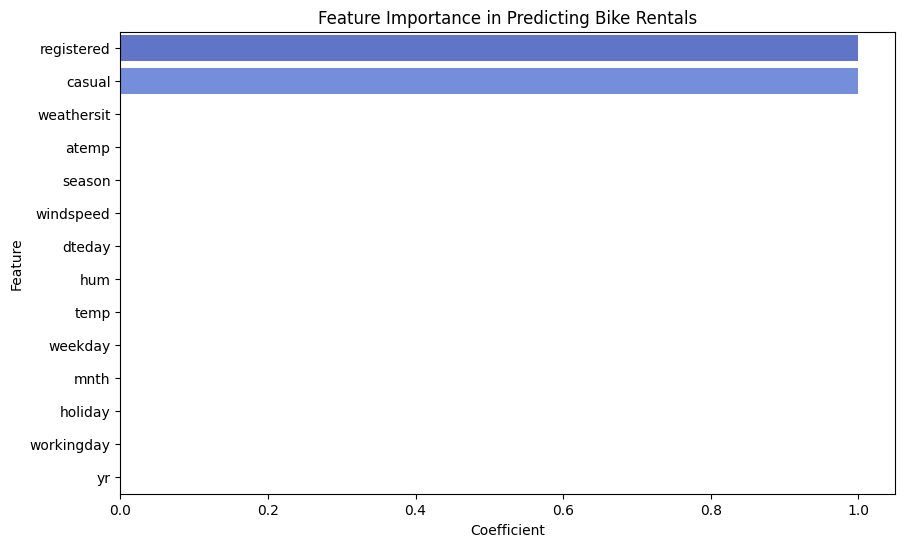

In [54]:
# Get feature coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.title("Feature Importance in Predicting Bike Rentals")
plt.show()

<Axes: xlabel='Coefficient', ylabel='Feature'>

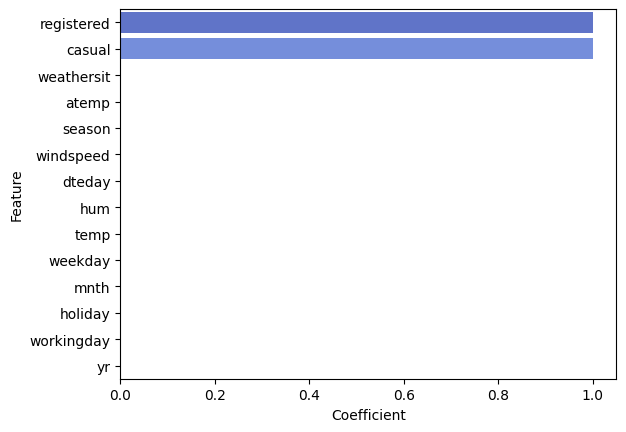

In [55]:
sns.barplot(x='Coefficient', y='Feature', hue='Feature', data=feature_importance, palette='coolwarm', legend=False)


In [56]:
y_pred = model.predict(X_test)


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 1.0901477589744002e-12
MSE: 1.9503899032286286e-24
RMSE: 1.3965636051496647e-12
R² Score: 1.0


In [58]:
import joblib

joblib.dump(model, "model.pkl")  # Save the model


['model.pkl']

In [60]:
model = joblib.load("model.pkl")


In [61]:
import os
print(os.getcwd())


C:\Users\asus\OneDrive\Desktop\jupyter projects
